<a href="https://colab.research.google.com/github/Shrikant-Khawshe/OIBSIP/blob/main/OIBSIP_TASK_2/OasisInfobyte_Internship_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# getting datasets
unemp = pd.read_csv('/content/Unemployment in India.csv')   
unemp_covid = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
# Display datasets
unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
unemp_covid.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
unemp.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
unemp = unemp.dropna()

In [ ]:
unemp.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
unemp_covid.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
unemp.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
unemp_covid.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

<ipython-input-87-f728d5cbd558>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds1 = unemp.corr()


<Axes: >

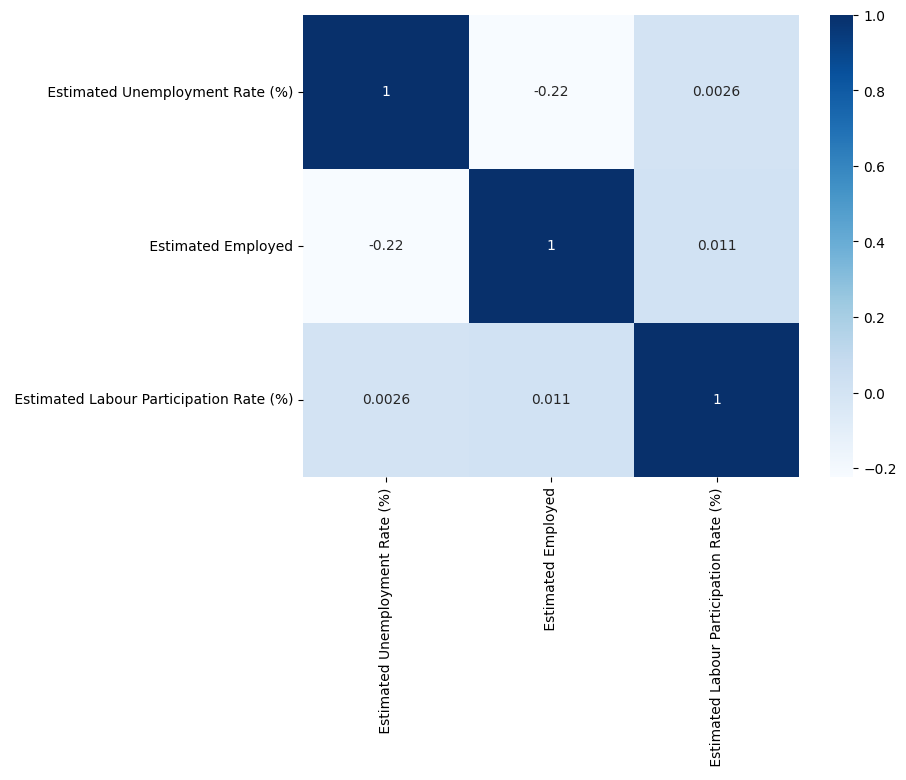

In [ ]:
plt.figure(figsize=(8,6))
ds1 = unemp.corr()
sns.heatmap(ds1, annot=True, cmap='Blues')

<ipython-input-88-54731c788aa9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds2 = unemp_covid.corr()


<Axes: >

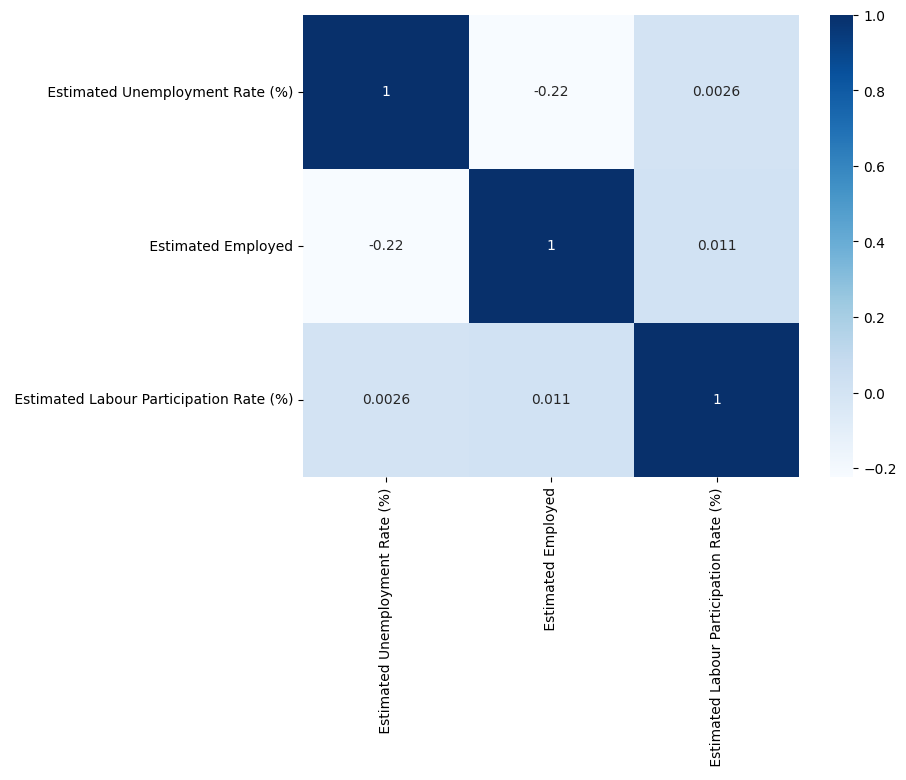

In [ ]:
plt.figure(figsize=(8,6))
ds2 = unemp_covid.corr()
sns.heatmap(ds1, annot=True, cmap='Blues')

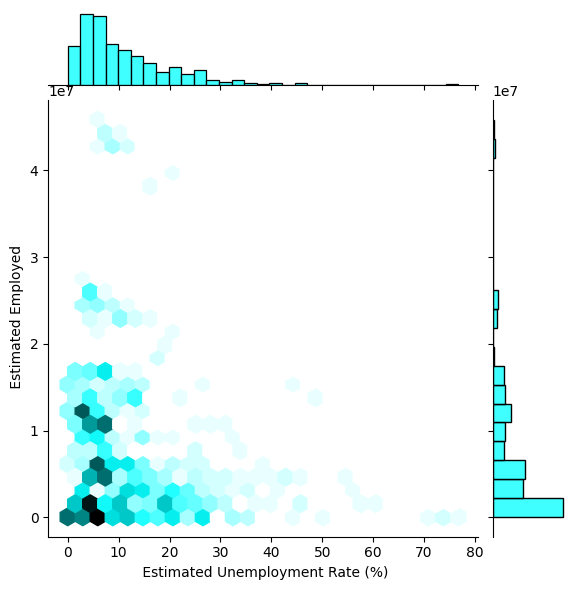

In [ ]:
sns.jointplot(x=' Estimated Unemployment Rate (%)', y=' Estimated Employed', data=unemp, kind='hex',color='cyan')

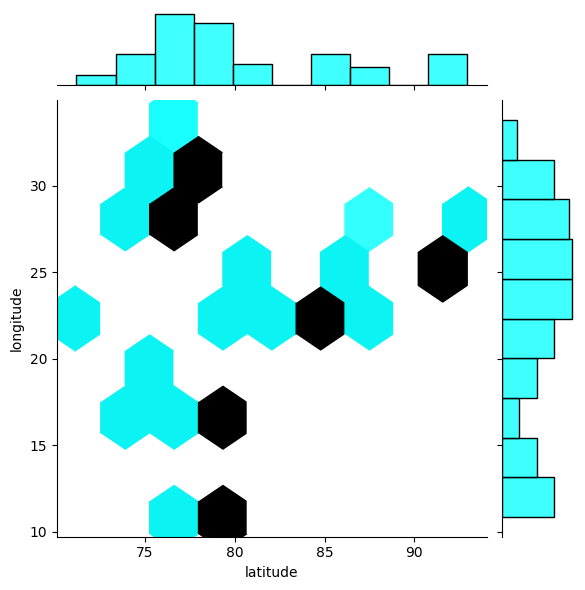

In [ ]:
sns.jointplot(x='latitude', y='longitude', data=unemp_covid, kind='hex',color='cyan')

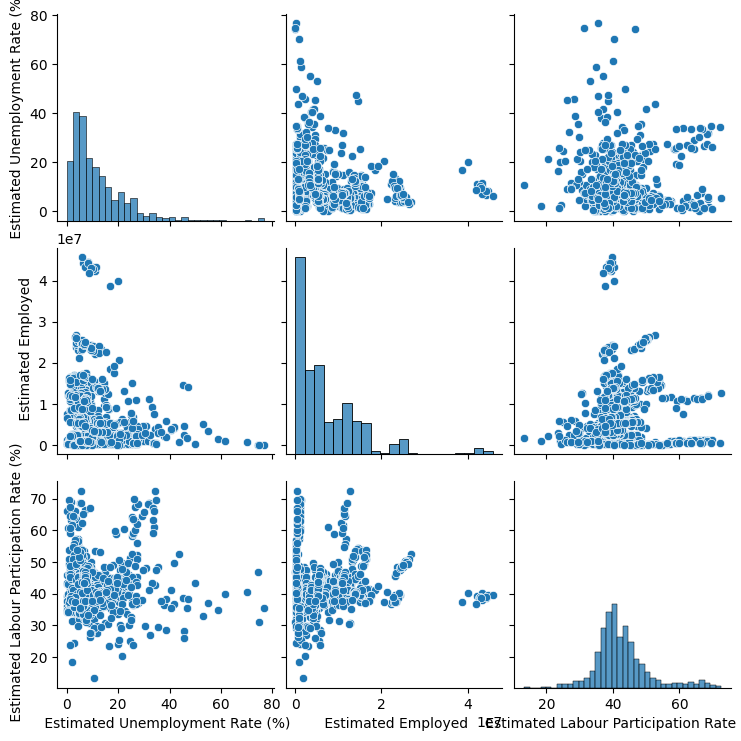

In [ ]:
sns.pairplot(unemp)

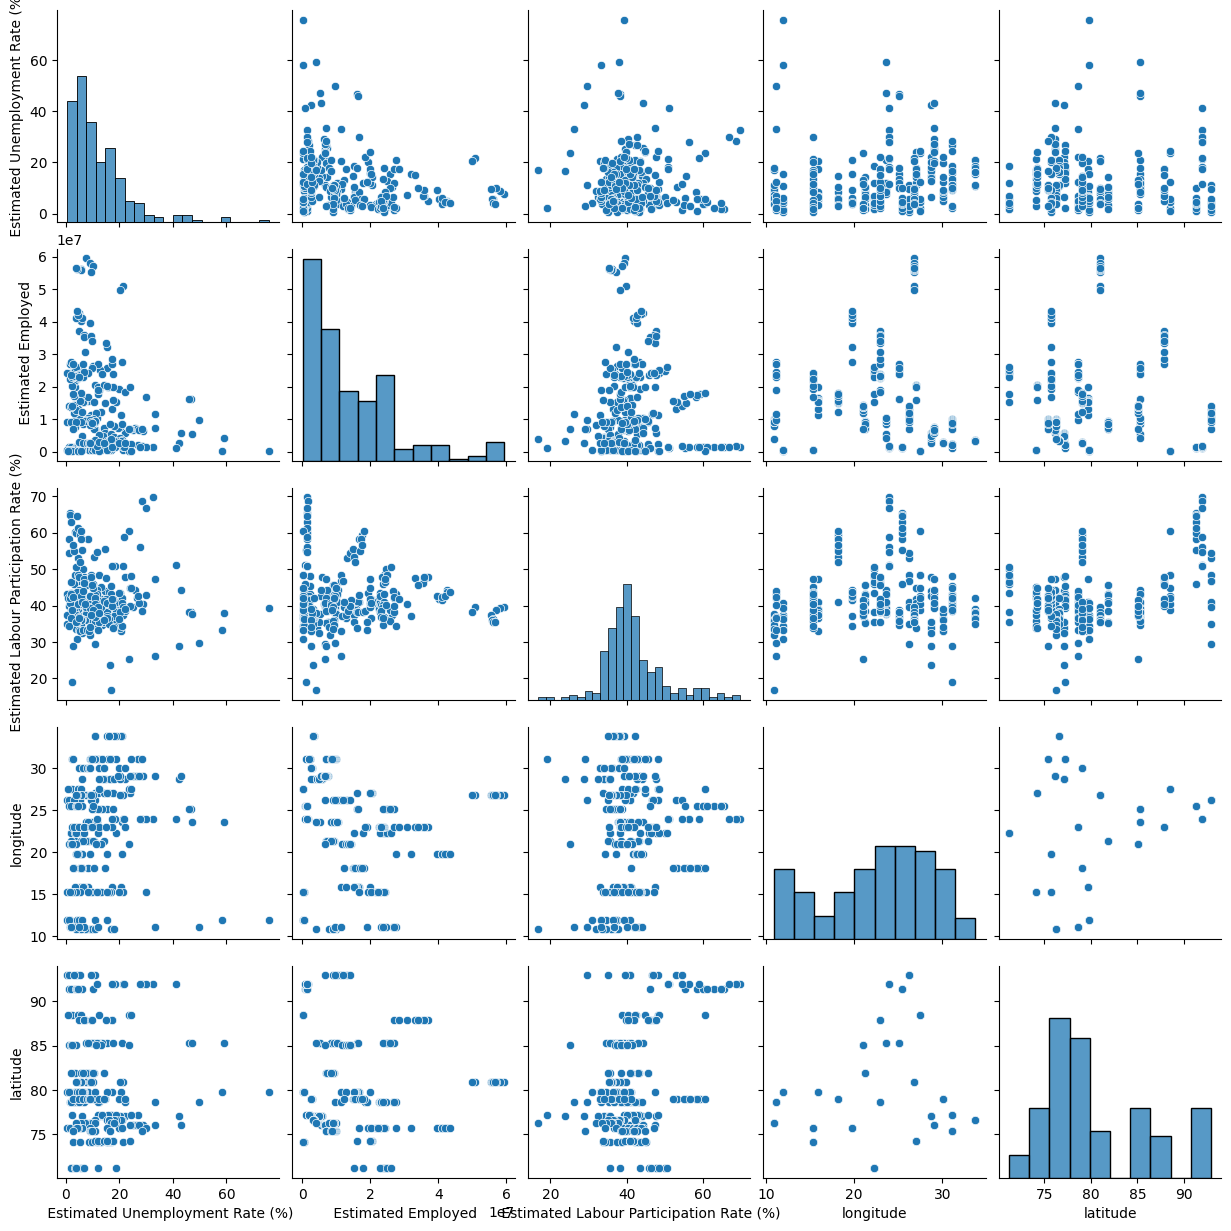

In [ ]:
sns.pairplot(unemp_covid)

In [ ]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-96-a31d999db15c>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = unemp_covid.groupby('Region').sum()


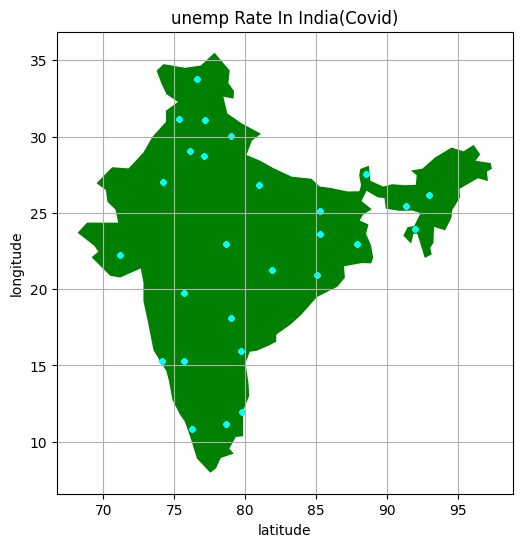

In [ ]:
import geopandas as gpd
# initialize an axis
fig, ax = plt.subplots(figsize=(8, 6))
# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "India"].plot(color="green", ax=ax)
# parse dates for plot's title
first_month = unemp_covid[" Estimated Employed"].min()
last_month = unemp_covid[" Estimated Employed"].max()

region_data1 = unemp_covid.groupby('Region').sum()
# plot points
unemp_covid.plot(x="latitude", y="longitude", kind="scatter",
        title=f"unemp Rate In India(Covid)",
        ax=ax, s=10,color='cyan')

ax.grid(visible=True, alpha=1)
plt.show()

<ipython-input-108-1b89db8a89d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data = unemp.groupby('Region').sum()


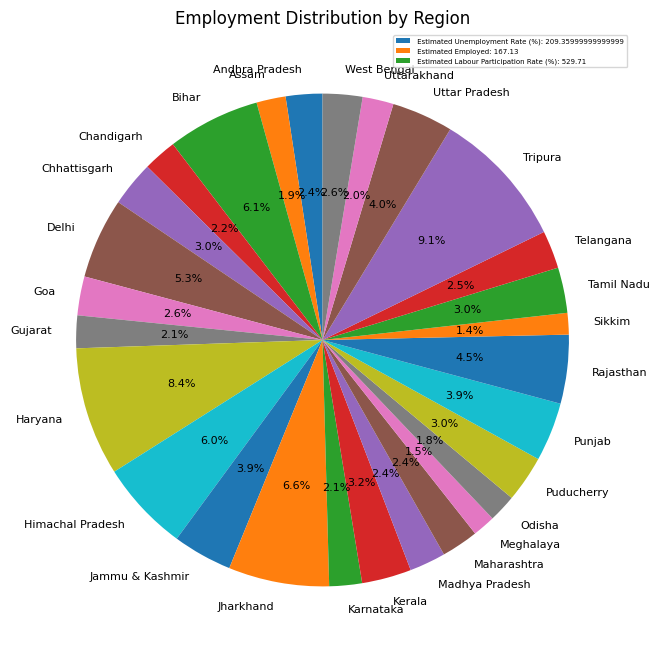

In [ ]:
region_data = unemp.groupby('Region').sum()
fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_data[' Estimated Unemployment Rate (%)'], labels=region_data.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data, region_data[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()


<ipython-input-109-07d7930fc9b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_data1 = unemp_covid.groupby('Region').sum()


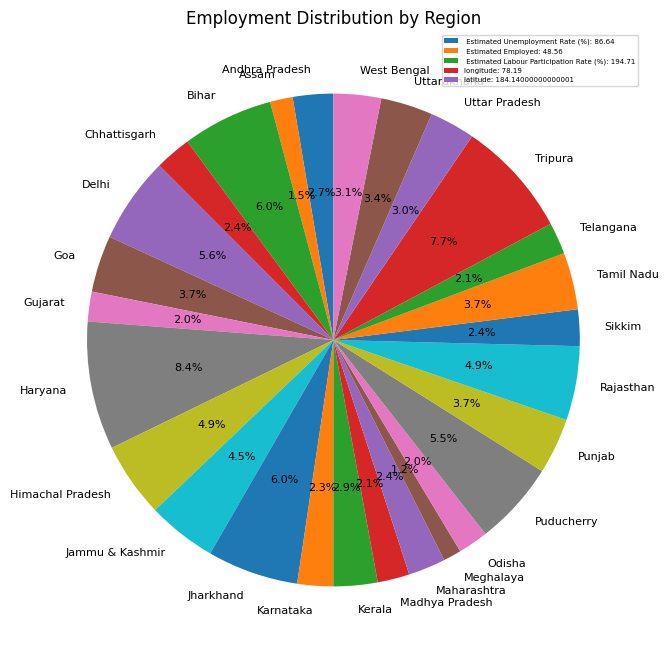

In [ ]:
region_data1 = unemp_covid.groupby('Region').sum()

fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(region_data1[' Estimated Unemployment Rate (%)'], labels=region_data1.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':8})
ax.legend(loc='upper right', labels=[f'{l}: {s}' for l, s in zip(region_data1, region_data1[' Estimated Unemployment Rate (%)'])], prop={'size': 5})
ax.set_title('Employment Distribution by Region')
plt.show()

In [ ]:
x_regions = np.array(unemp['Region'])
x_regions_cov = np.array(unemp_covid['Region'])
y_unp = np.array(unemp[' Estimated Labour Participation Rate (%)'])
y_unp_covid = np.array(unemp_covid[' Estimated Labour Participation Rate (%)'])

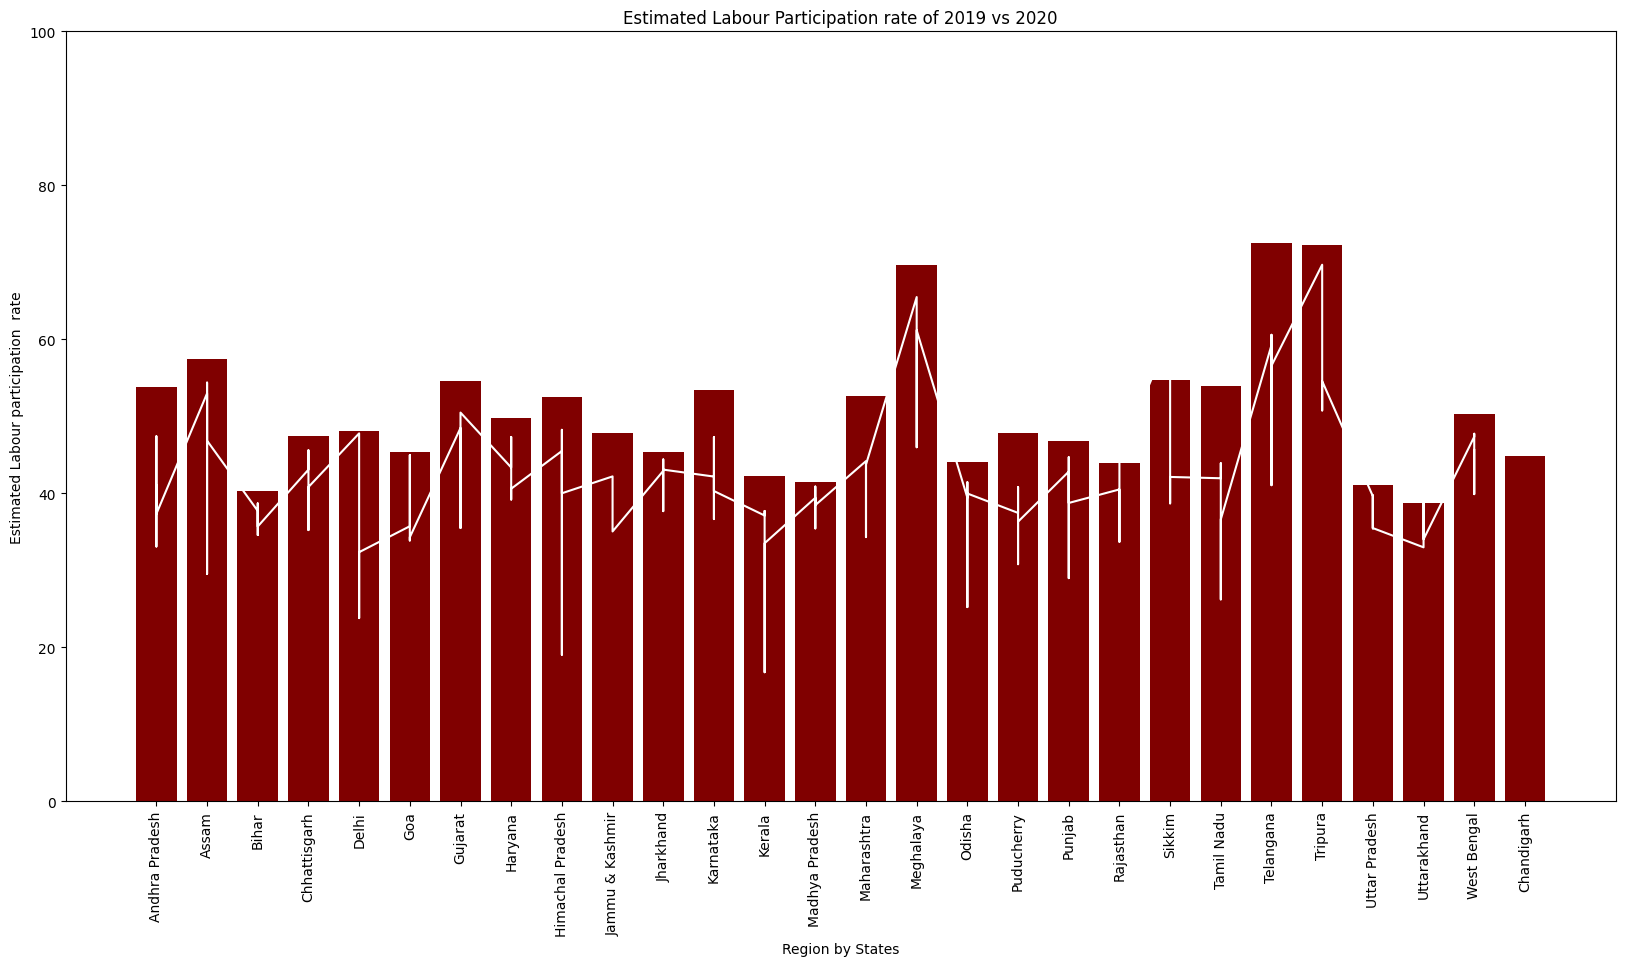

In [ ]:
fig = plt.figure(figsize=(20, 10))

plt.bar(x_regions, y_unp, color= 'maroon')
plt.plot(x_regions_cov, y_unp_covid, color= 'white')
plt.ylim(0, 100)

labels = sorted(set(unemp['Region']))
plt.xticks(labels, rotation='vertical')

plt.xlabel('Region by States')
plt.ylabel('Estimated Labour participation  rate')
plt.title('Estimated Labour Participation rate of 2019 vs 2020')

plt.show()

<ipython-input-101-3a93b480e602>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = unemp.groupby(["Region", " Date"]).sum()


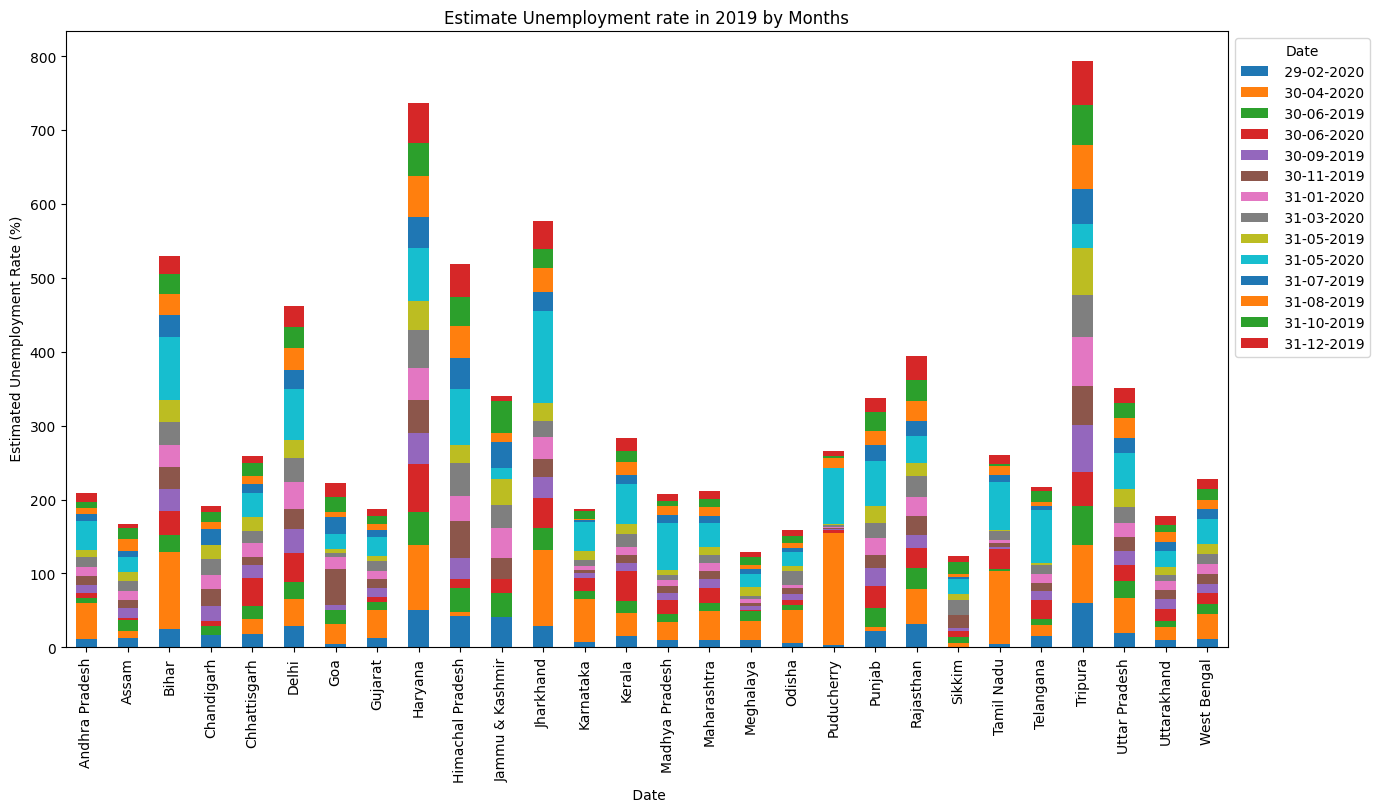

In [ ]:
# Group data by region and date
grouped_df = unemp.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")
plt.title('Estimate Unemployment rate in 2019 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()

<ipython-input-102-2fcdb12d29a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = unemp_covid.groupby(["Region", " Date"]).sum()


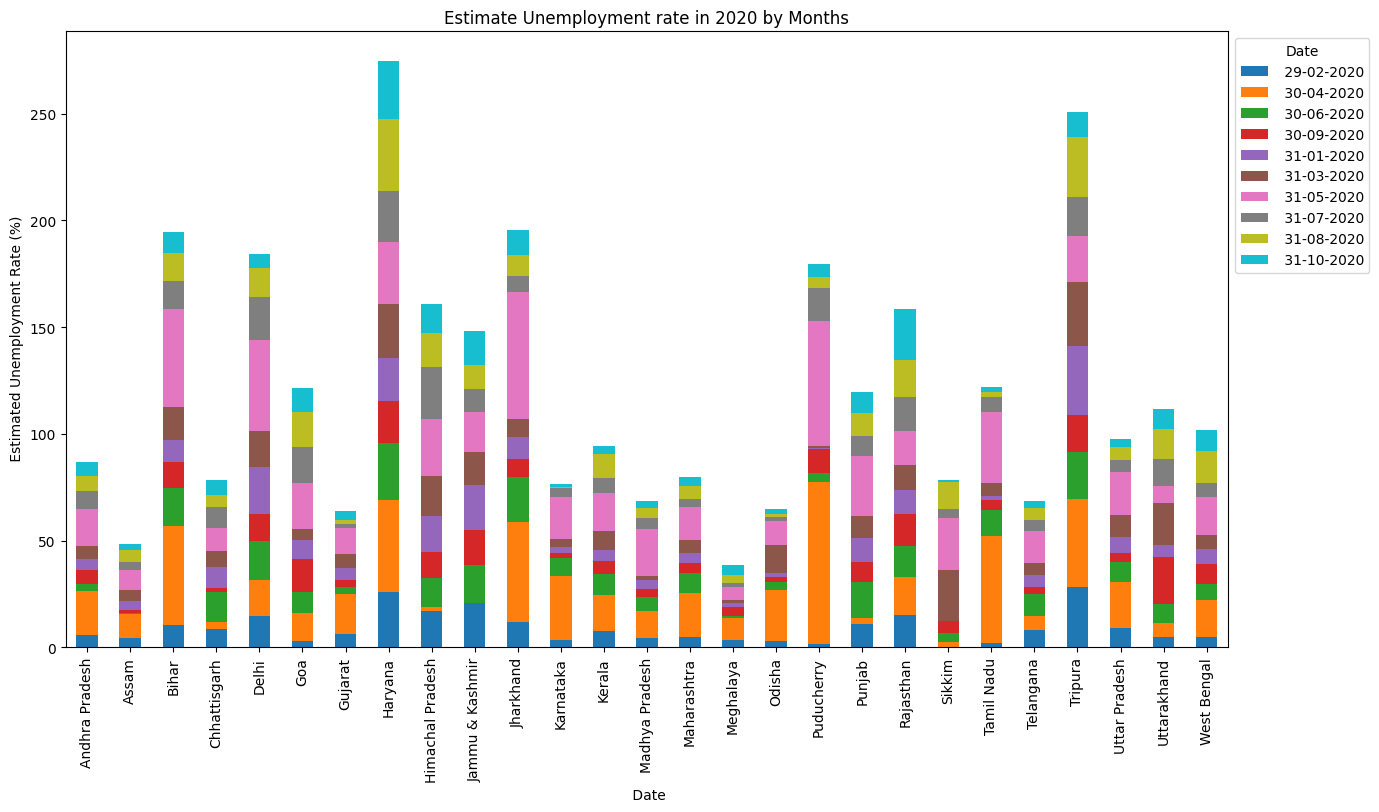

In [ ]:
# Group data by region and date
grouped_df1 = unemp_covid.groupby(["Region", " Date"]).sum()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(15,8))
grouped_df1[" Estimated Unemployment Rate (%)"].unstack().plot.bar(stacked=True, ax=ax)

# Label the plot
ax.set_ylabel(" Estimated Unemployment Rate (%)")
ax.set_xlabel(" Date")
plt.title('Estimate Unemployment rate in 2020 by Months')

# Arrange legend to the right upper corner
ax.legend(title="Date", loc='upper left', bbox_to_anchor=(1,1))

# Show plot
plt.show()